In [2]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from collections import Counter

2025-05-27 14:20:40.140380: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-27 14:20:40.906161: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748348441.194391  138468 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748348441.271830  138468 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748348441.914971  138468 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
raw_data_dir = '../data/raw_imgs/LIS-fingerspelling-dataset'
img_ex = cv2.imread(os.path.join(raw_data_dir, 'a', 'a_ANTONIA_1_bottom.JPG'))
img_ex.shape

(415, 622, 3)

In [4]:
dataset_raw = tf.keras.utils.image_dataset_from_directory(
    raw_data_dir,
    image_size=(224,224),
    batch_size=32,
    shuffle=True,
    seed=123
)

data_iterator = dataset_raw.as_numpy_iterator()
data_iterator

Found 7078 files belonging to 24 classes.


I0000 00:00:1748348454.907745  138468 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1753 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7f54378823b0>)

In [5]:
train_split_dir = '../data/raw_imgs/splits/train'
val_split_dir = '../data/raw_imgs/splits/val'
test_split_dir = '../data/raw_imgs/splits/test'

train_raw = tf.keras.utils.image_dataset_from_directory(
    train_split_dir,
    image_size=(224,224),
    batch_size=32,
    shuffle=True,
    seed=123
)

test_raw = tf.keras.utils.image_dataset_from_directory(
    test_split_dir,
    image_size=(224,224),
    batch_size=32,
    shuffle=True,
    seed=123
)

val_raw = tf.keras.utils.image_dataset_from_directory(
    val_split_dir,
    image_size=(224,224),
    batch_size=32,
    shuffle=True,
    seed=123
)

train_iterator = train_raw.as_numpy_iterator()
test_iterator = test_raw.as_numpy_iterator()
val_iterator = val_raw.as_numpy_iterator()

train_iterator, test_iterator, val_iterator

Found 5654 files belonging to 24 classes.
Found 719 files belonging to 24 classes.
Found 705 files belonging to 24 classes.


(NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7f54378c97e0>),
 NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7f5437134640>),
 NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7f5437135690>))

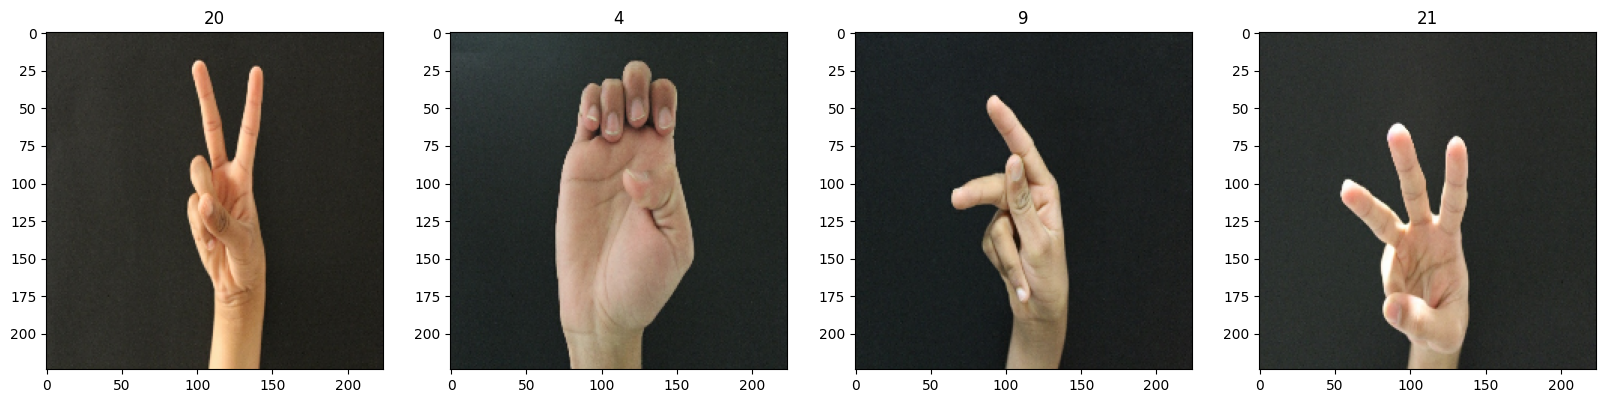

In [6]:
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

2025-05-27 14:21:02.310263: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


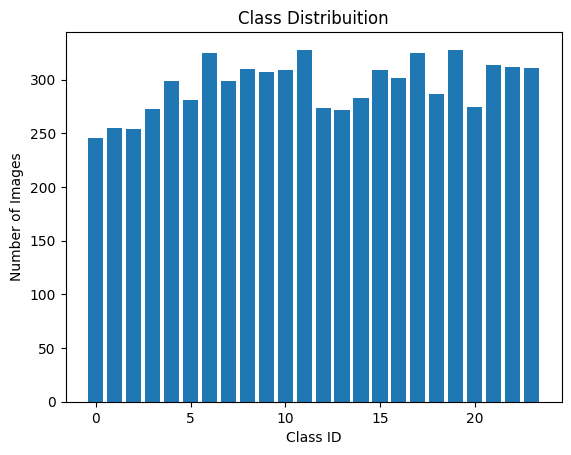

In [7]:
all_labels = []

for _, labels in dataset_raw:
    all_labels.extend(labels.numpy())

label_counts = Counter(all_labels)

# Plot labels distribuition
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.title("Class Distribuition")
plt.show()

## Visualizing data after Augmentation Pipeline

In [8]:
raw_data_dir = '../data/processed_imgs'
img_ex = cv2.imread(os.path.join(raw_data_dir, 'a', 'aug_0_a_GIANLUCA_39_top.JPG'))
img_ex.shape

(224, 224, 3)

In [10]:
dataset_processed= tf.keras.utils.image_dataset_from_directory(
    raw_data_dir,
    image_size=(224,224),
    batch_size=32,
    shuffle=True,
    seed=123
)

aug_data_iterator = dataset_processed.as_numpy_iterator()
aug_data_iterator

Found 35390 files belonging to 24 classes.


NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7f53fbf7fb20>)

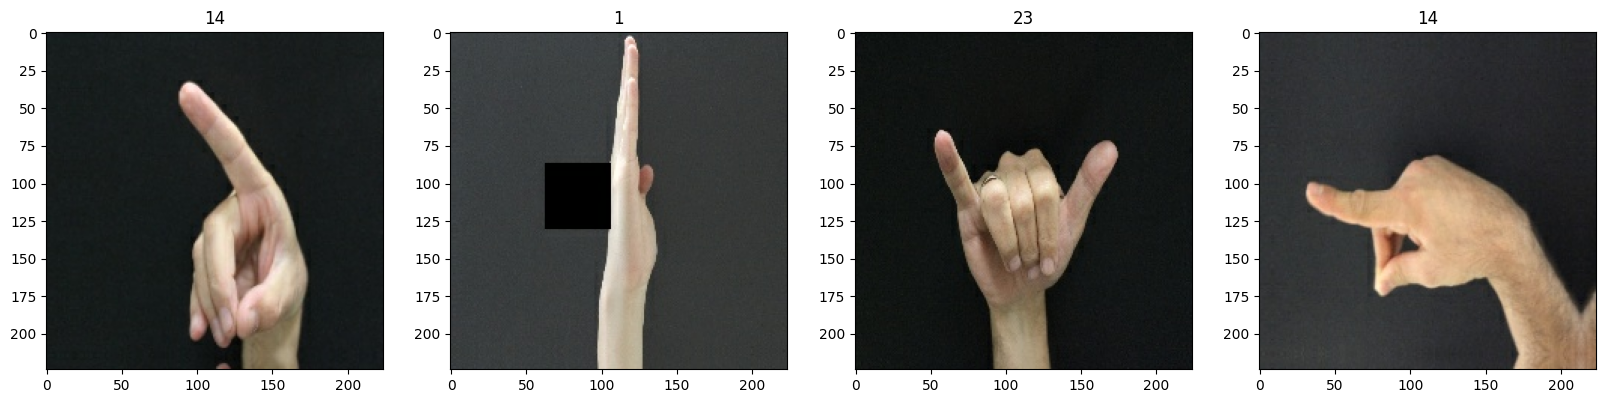

In [20]:
batch = aug_data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

###### Class distribution after augmentation

2025-05-27 14:23:15.758603: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


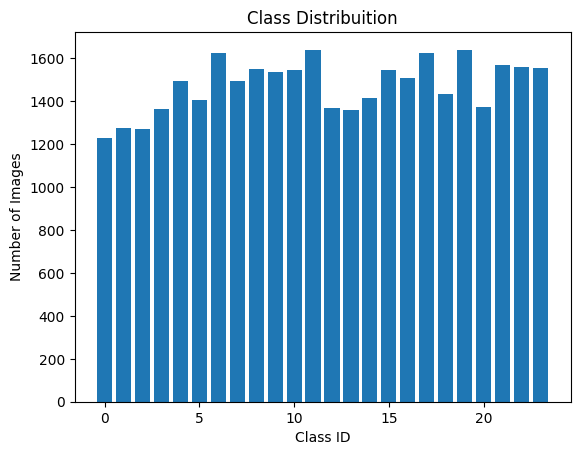

In [21]:
all_labels = []

for _, labels in dataset_processed:
    all_labels.extend(labels.numpy())

label_counts = Counter(all_labels)

# Plot labels distribuition
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.title("Class Distribuition")
plt.show()